In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../Datasets/REGN_processed.csv')
time_series = df.reset_index()['Close']

In [3]:
def auto_arima_model(time_series, ratio, periods=90):
    training_size = int(len(time_series) * ratio)
    train_data, test_data = time_series[:training_size], time_series[training_size:]
    
    # Fit the ARIMA model
    model = pm.auto_arima(train_data, seasonal=False, stepwise=True)
    
    # Make predictions
    forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
    
    # Forecast future values
    future_forecast = model.predict(n_periods=periods)
    
    return model, train_data, test_data, forecast, conf_int, future_forecast

In [4]:
def calculate_metrics(test_data, forecast):
    mae = mean_absolute_error(test_data, forecast)
    mape = mean_absolute_percentage_error(test_data, forecast)*100
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    return mae, mape, rmse

In [5]:
def plot_predictions(time_series, ratio, periods=90):
    model, train_data, test_data, forecast, conf_int, future_forecast = auto_arima_model(time_series, ratio, periods)
    
    mae, mape, rmse = calculate_metrics(test_data, forecast)
    
    plt.figure(figsize=(10, 6))

    # Plot the training data
    plt.plot(range(len(train_data)), train_data, label='Train')

    # Plot the test data
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test', color='orange')

    # Plot the forecasted values
    plt.plot(range(len(train_data), len(train_data) + len(forecast)), forecast, label='Predict', color='green')

    # Plot future forecasts
    plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + 30), future_forecast[:30], label='Predict30days', color='red')
    plt.plot(range(len(train_data) + len(test_data) + 30, len(train_data) + len(test_data) + 60), future_forecast[30:60], label='Predict60days', color='purple')
    plt.plot(range(len(train_data) + len(test_data) + 60, len(train_data) + len(test_data) + 90), future_forecast[60:], label='Predict90days', color='brown')

    plt.title(f'Train/Test Ratio: {int(ratio*10)}/{10-int(ratio*10)}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}')
    print(f'RMSE: {rmse:.4f}')
    plt.legend()
    plt.show()

MAE: 194.3134
MAPE: 24.0651
RMSE: 207.5631


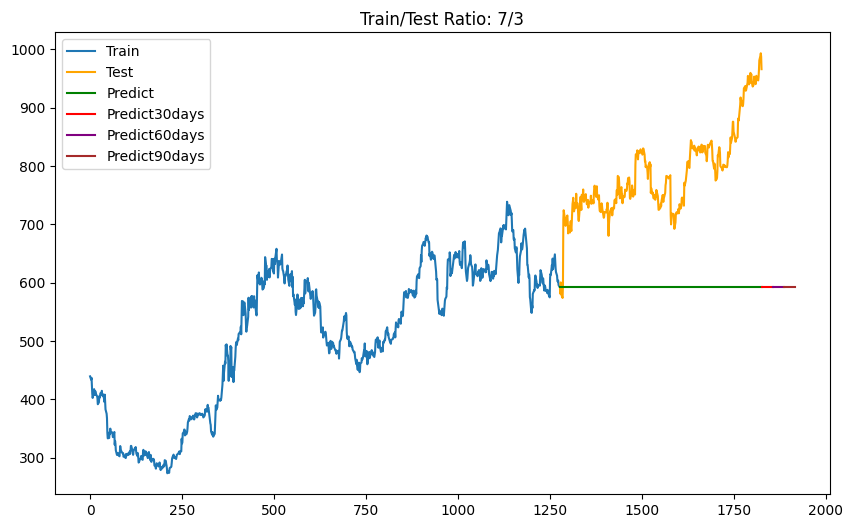

MAE: 68.1368
MAPE: 7.8934
RMSE: 88.6437


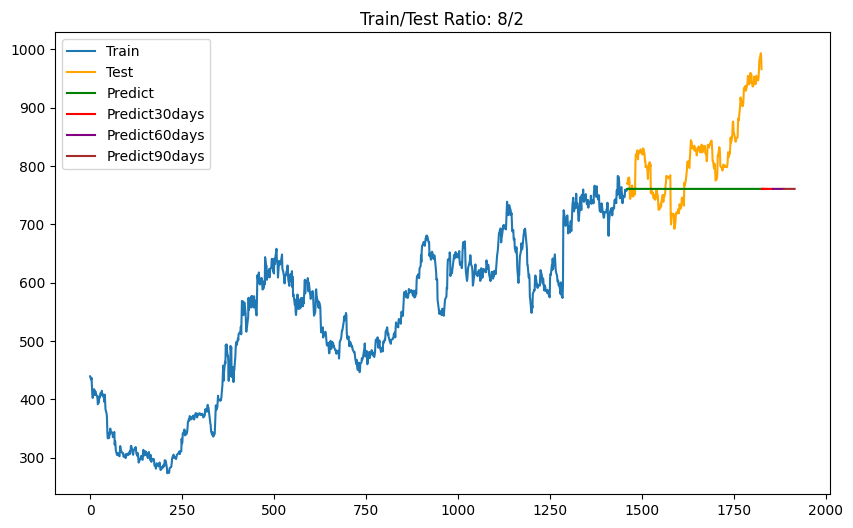

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit

MAE: 136.5513
MAPE: 17.1281
RMSE: 160.6834


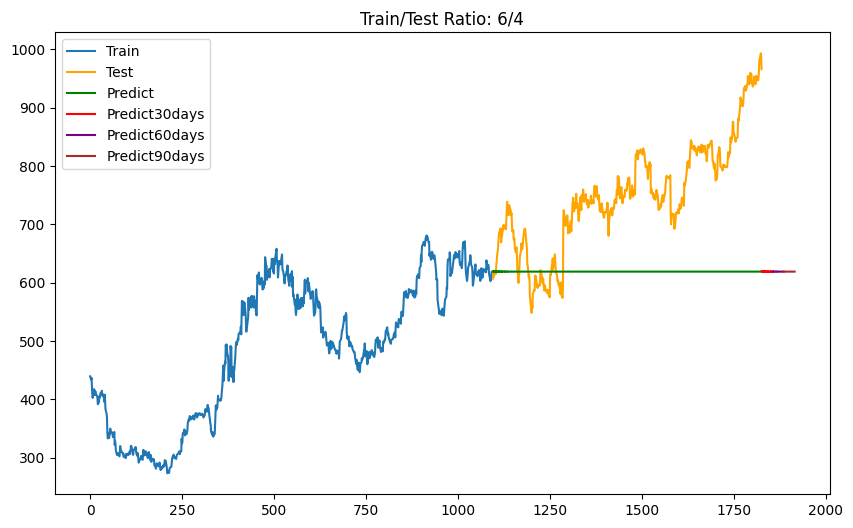

In [6]:
# Define the ratios for splitting the data
ratios = [0.7, 0.8, 0.6]

for ratio in ratios:
    plot_predictions(time_series, ratio)
    